IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from mpl_toolkits.mplot3d import Axes3D
#import mplcursors
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
my_dataset =  pd.read_csv('/Users/da_learner_m1_19/Downloads/segmentation data.csv')

In [3]:
my_dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
my_dataset.keys()

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
my_dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Correlation Heatmap

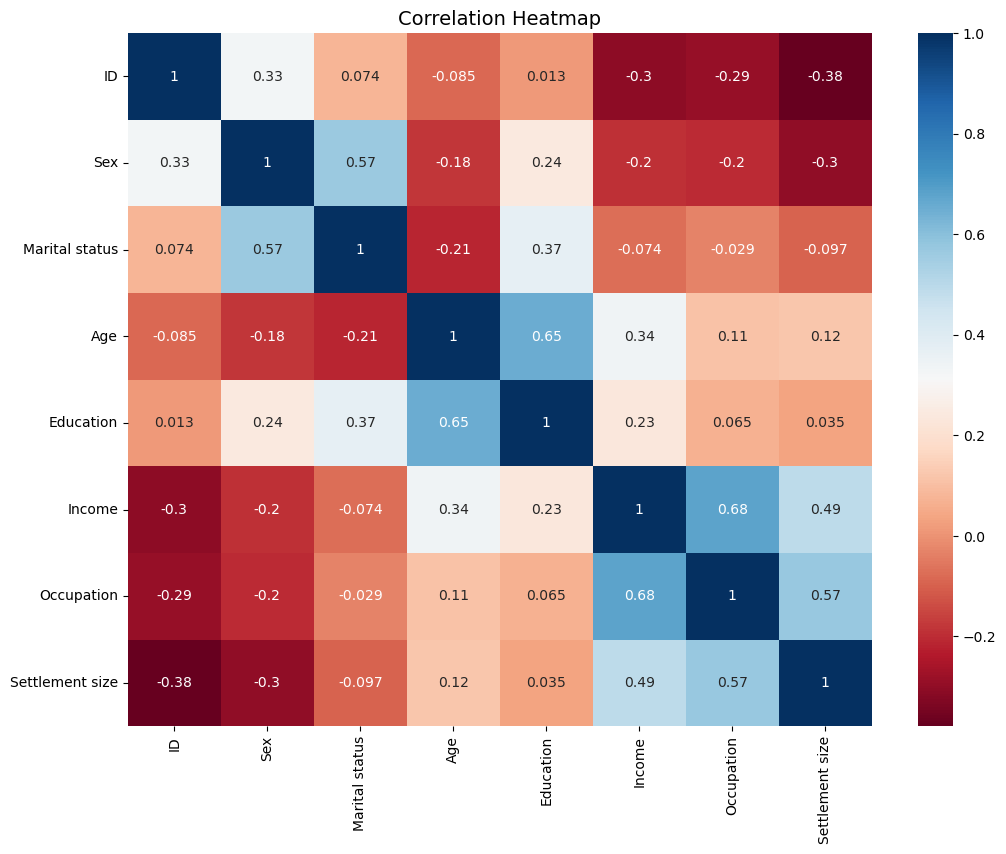

In [6]:
plt.figure(figsize=(12,9))
sns.heatmap(my_dataset.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()


The correletion between Education & Age is high, in order words we can say older people tend to be more highly educated

income and occupation?

Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.



In [7]:
# create scaler object
scaler = StandardScaler()
scaler.fit(my_dataset)

StandardScaler()

In [8]:
# scale the data
scaled_data=scaler.transform(my_dataset)
scaled_data

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

TO REDUCE DIMENSTION INTO 2

In [9]:
# Perform PCA with n_components=2 to reduce the variables to 2
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [10]:
x_pca=pca.transform(scaled_data)

In [11]:
scaled_data.shape

(2000, 8)

In [12]:
x_pca.shape

(2000, 2)

In [13]:
x_pca

array([[ 2.85978214,  0.93667597],
       [ 0.94413038,  0.39449213],
       [-0.02303213, -0.8817974 ],
       ...,
       [-1.84179778, -2.15868138],
       [-2.71683211,  0.56139001],
       [-2.2097949 , -2.42344957]])

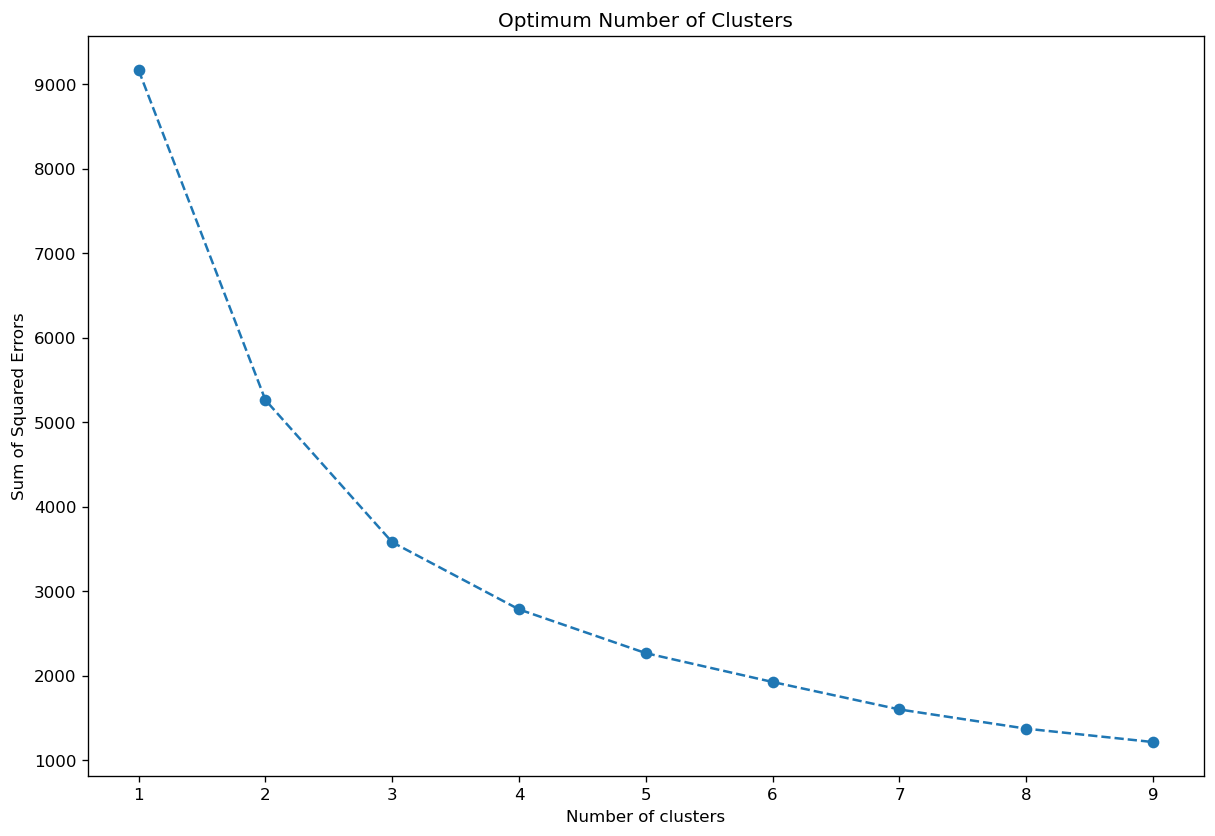

In [14]:
# Use the elbow method to find the optimum number of clusters
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,8), dpi=120)
plt.plot(range(1, 10), sse,'o--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Optimum Number of Clusters')
plt.show()

In [15]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

df_pca_compenents = pd.DataFrame(
    data=pca.components_.round(2),
    columns=my_dataset.columns.values,
    index=['component 1','component 2']
)

df_pca_compenents

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component 1,-0.35,-0.33,-0.19,0.27,0.10,0.48,0.46,0.45
component 2,0.11,0.42,0.47,0.36,0.65,0.18,0.06,-0.03


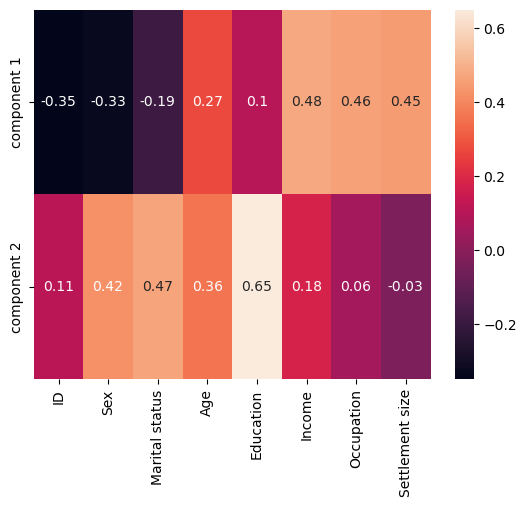

In [16]:
sns.heatmap(df_pca_compenents,annot=True)
plt.show()

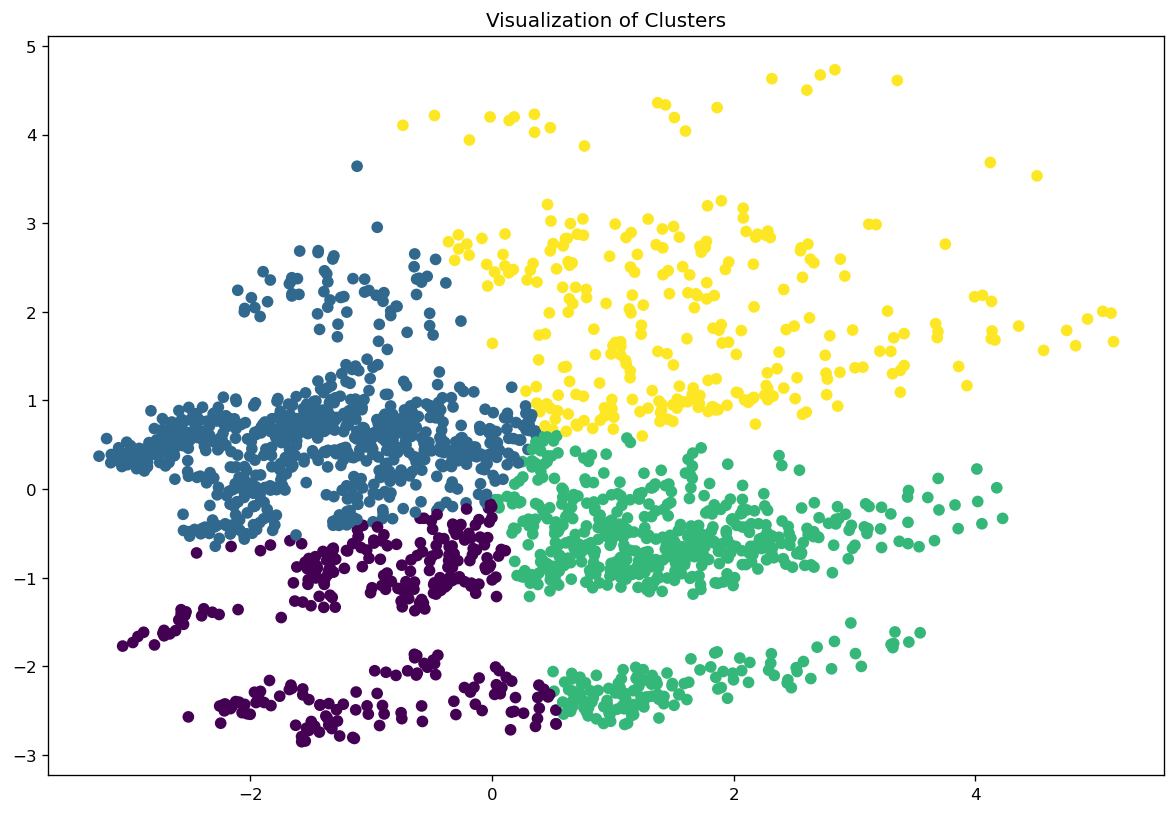

In [17]:

# Based on the elbow method, the optimum number of clusters is 4
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(x_pca)

# Get the cluster labels for each sample
labels = kmeans.labels_

# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.title('Visualization of Clusters')
plt.show()




Concatenate dataset with PCA

In [18]:
seg_pca_kmeans=pd.concat([my_dataset.reset_index(drop=True),pd.DataFrame(x_pca)],axis=1)

In [19]:
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124


In [20]:
seg_pca_kmeans['segment K-means PCA']=labels
seg_pca_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,3
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,2
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,0
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,2
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,2


In [21]:
df_segm_analysis = seg_pca_kmeans.groupby(['segment K-means PCA']).mean()
df_segm_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1
segment K-means PCA,,,,,,,,,,
0,1.000011e+08,0.114286,0.117460,31.755556,0.533333,92677.196825,0.311111,0.136508,-0.958247,-1.452620
1,1.000013e+08,0.915033,0.809150,31.699346,1.116340,102070.247059,0.516340,0.254902,-1.402355,0.597683
2,1.000007e+08,0.042188,0.206250,35.895313,0.782813,139131.956250,1.210938,1.393750,1.426489,-0.868139
3,1.000008e+08,0.539286,0.732143,52.114286,1.975000,162811.892857,1.260714,1.242857,1.648917,1.985560


In [22]:
seg_pca_kmeans['K segments']=seg_pca_kmeans['segment K-means PCA'].map({0:'mid-income,young adults,mid city,varsity graduates',
1:'single middle-income,big city,middle age,',2:'high-income proffesionals,high educated,big city& mid city ',
3:'low-income from small city,single youth and with high school education'})

Group Accordingly

In [23]:

# seg_pca_kmeans['K segments']=seg_pca_kmeans['segment K-means PCA'].map({0:'K= one',1:'k=two',2:'k=three',3:'k=four'})
# seg_pca_kmeans

In [24]:
seg_pca_kmeans

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,segment K-means PCA,K segments
0,100000001,0,0,67,2,124670,1,2,2.859782,0.936676,3,"low-income from small city,single youth and wi..."
1,100000002,1,1,22,1,150773,1,2,0.944130,0.394492,2,"high-income proffesionals,high educated,big ci..."
2,100000003,0,0,49,1,89210,0,0,-0.023032,-0.881797,0,"mid-income,young adults,mid city,varsity gradu..."
3,100000004,0,0,45,1,171565,1,1,2.212422,-0.563616,2,"high-income proffesionals,high educated,big ci..."
4,100000005,0,0,53,1,149031,1,1,2.110202,-0.425124,2,"high-income proffesionals,high educated,big ci..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-1.485348,0.432286,1,"single middle-income,big city,middle age,"
1996,100001997,1,1,27,1,117744,1,0,-1.672129,0.839600,1,"single middle-income,big city,middle age,"
1997,100001998,0,0,31,0,86400,0,0,-1.841798,-2.158681,0,"mid-income,young adults,mid city,varsity gradu..."
1998,100001999,1,1,24,1,97968,0,0,-2.716832,0.561390,1,"single middle-income,big city,middle age,"


After Grouping

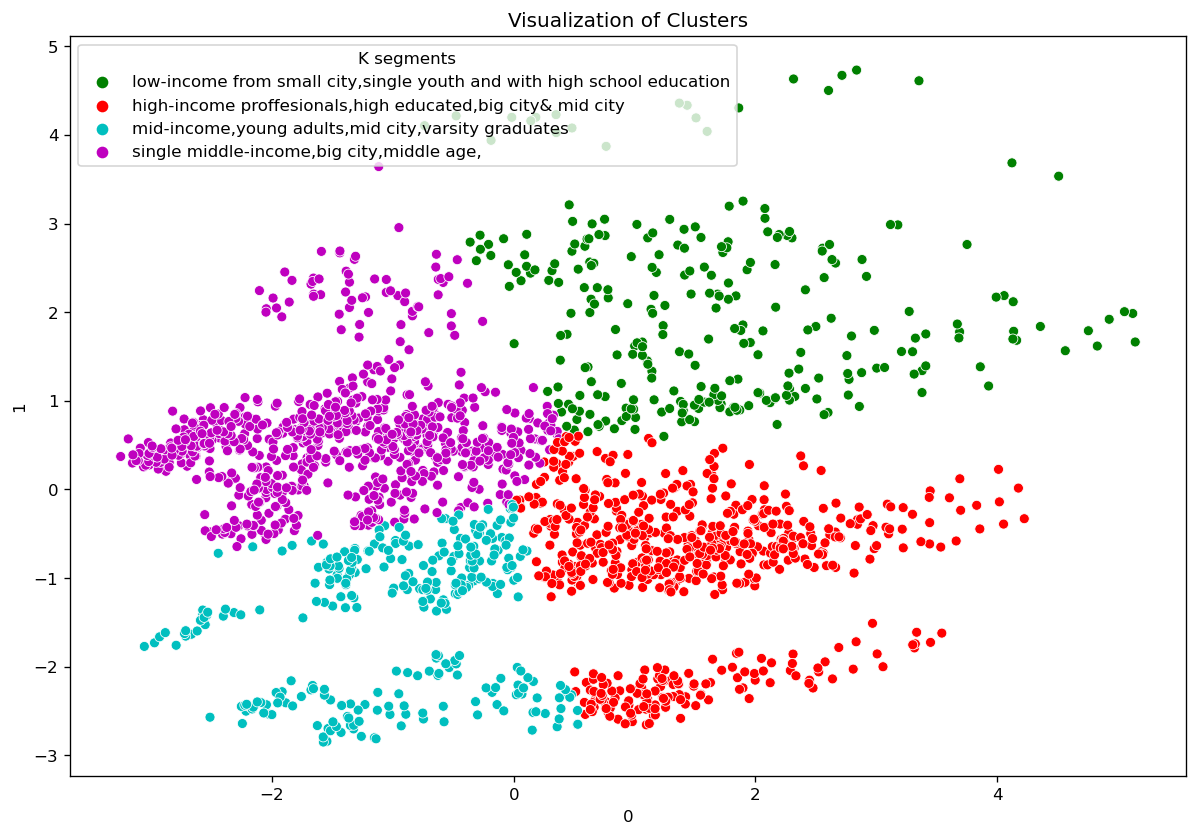

In [25]:
# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans.iloc[:,-4], seg_pca_kmeans.iloc[:,-3], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
#plt.scatter(x_pca[:, 0], x_pca[:, 1], label=seg_pca_kmeans['segment'])
plt.title('Visualization of Clusters')
plt.show()

In [26]:
from mpl_toolkits.mplot3d import Axes3D


In [27]:
import plotly.express as px

fig = px.scatter_3d(seg_pca_kmeans, x='Age', y='Income', z='Education',
              color='K segments',size_max=10)
fig.update_layout(margin=dict(l=6, r=6, b=6, t=6))

Your task was to analyze a demographics dataset and do customer segmentation for a new product/service. Your product/service is an exclusive life insurance package meant specifically for elderly people. In doing this we used a clustering method in machine learning to find the optimal number of clusters available in the dataset. with that, we also had to pick the cluster that best explains our target customer. To reach the ideal customer, we had to do sub-clusters based on features that best explain our customer. we considerd age(59 - 99 years), income( only high earners can qualify) , we also looked at the settlement size ( people in small cities are unemployed and don't have savings, maybe  unhealthy) . ......

In [28]:
fig = px.scatter_3d(seg_pca_kmeans, x='Age', y='Income', z='Settlement size',
              color='K segments',size_max=8)

fig.update_layout(margin=dict(l=2, r=2, b=2, t=2))



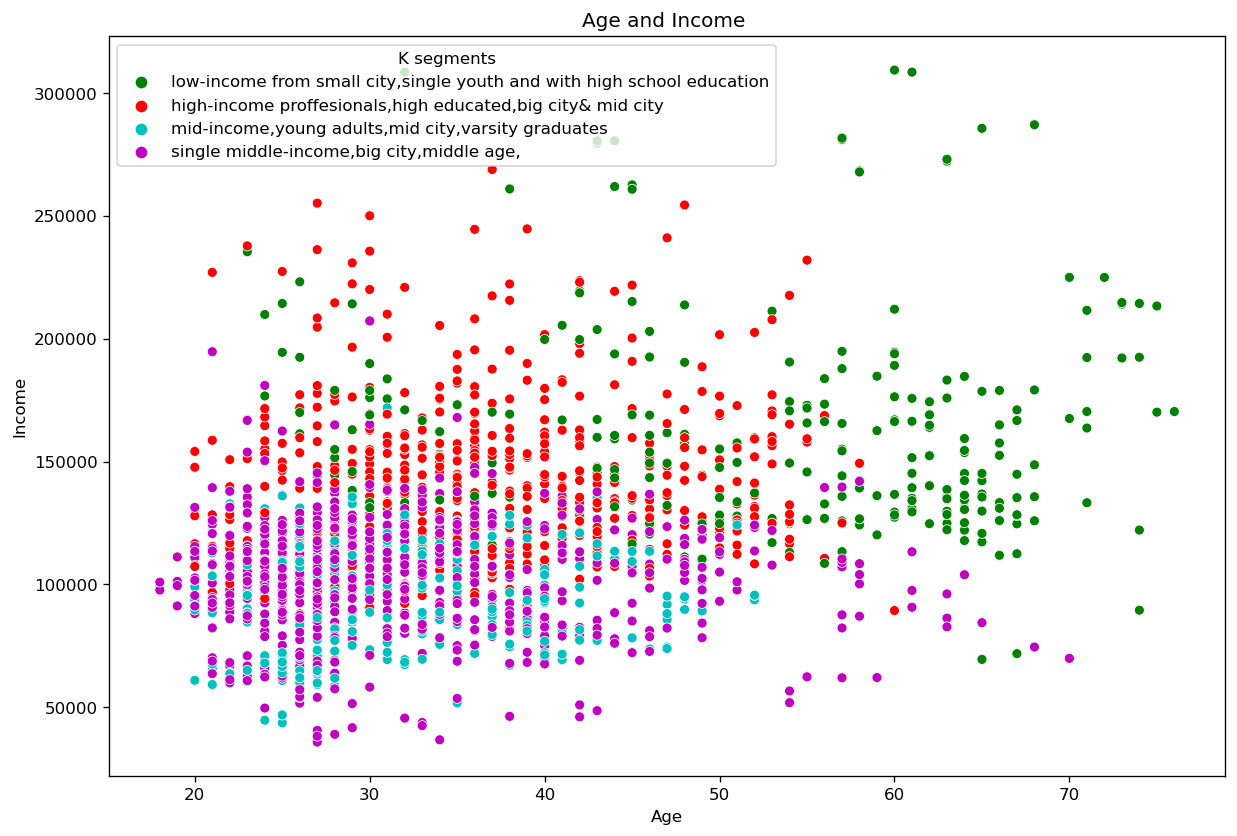

In [29]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Age'], seg_pca_kmeans['Income'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
#plt.scatter(x_pca[:, 0], x_pca[:, 1], label=seg_pca_kmeans['segment'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income ')
plt.show()

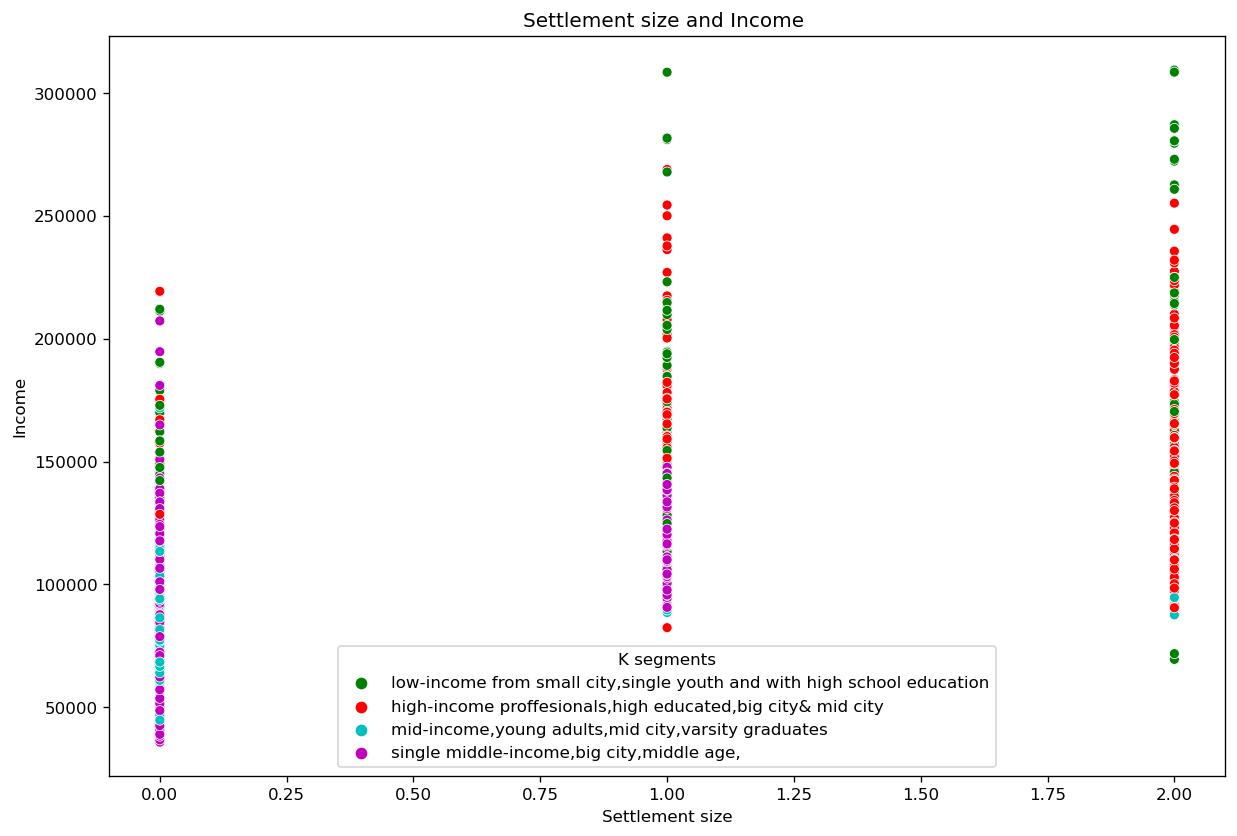

In [30]:
# Plot the data, colored by cluster
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Income'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
#plt.scatter(x_pca[:, 0], x_pca[:, 1], label=seg_pca_kmeans['segment'])
plt.xlabel('Settlement size')
plt.ylabel('Income')
plt.title('Settlement size and Income ')
plt.show()


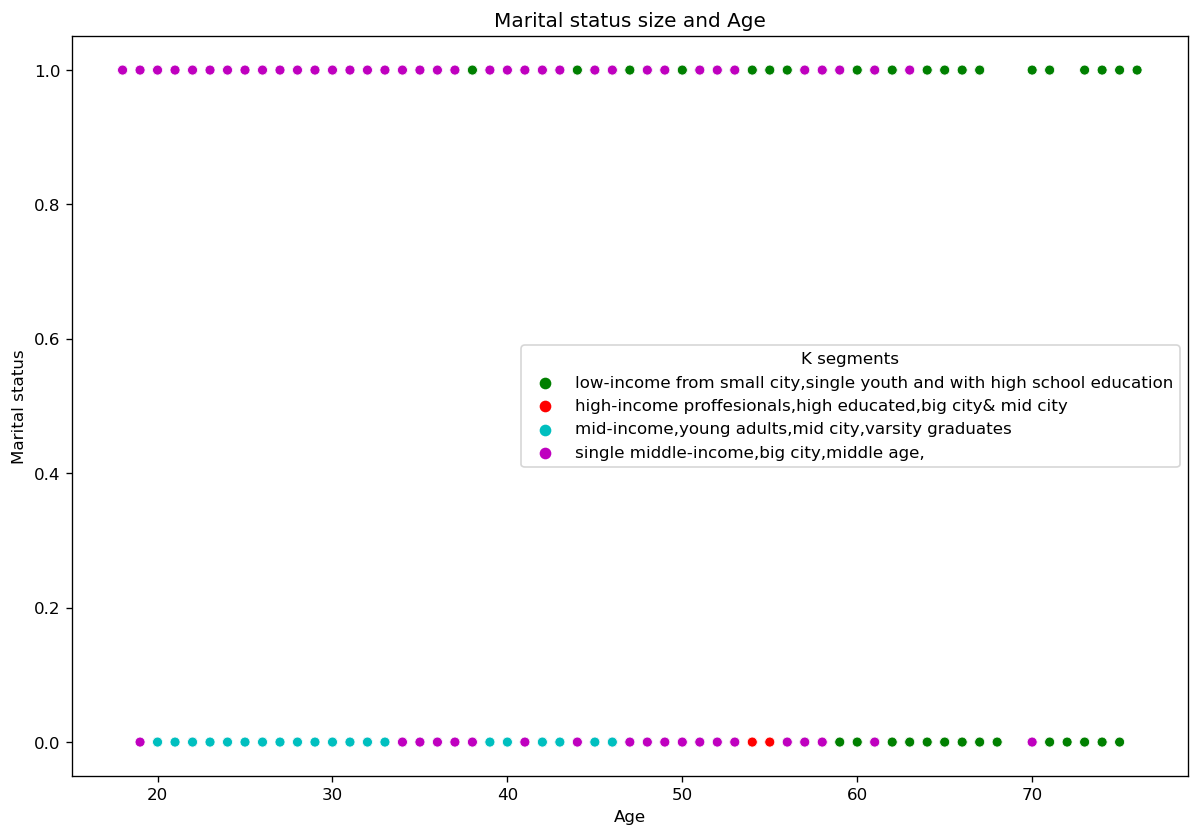

In [31]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Age'], seg_pca_kmeans['Marital status'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
plt.xlabel('Age')
plt.ylabel('Marital status')
plt.title('Marital status size and Age')
plt.show()

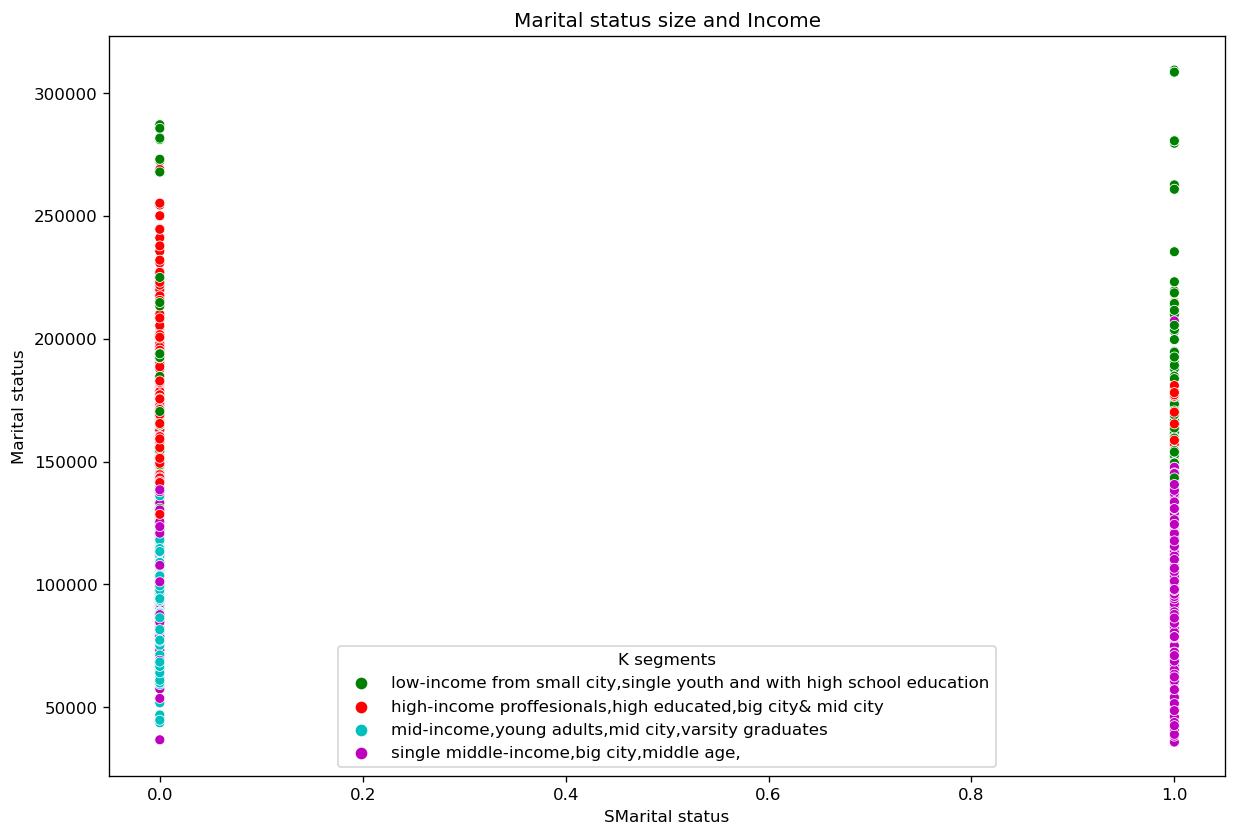

In [32]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Marital status'], seg_pca_kmeans['Income'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
plt.xlabel('SMarital status')
plt.ylabel('Marital status')
plt.title('Marital status size and Income')
plt.show()

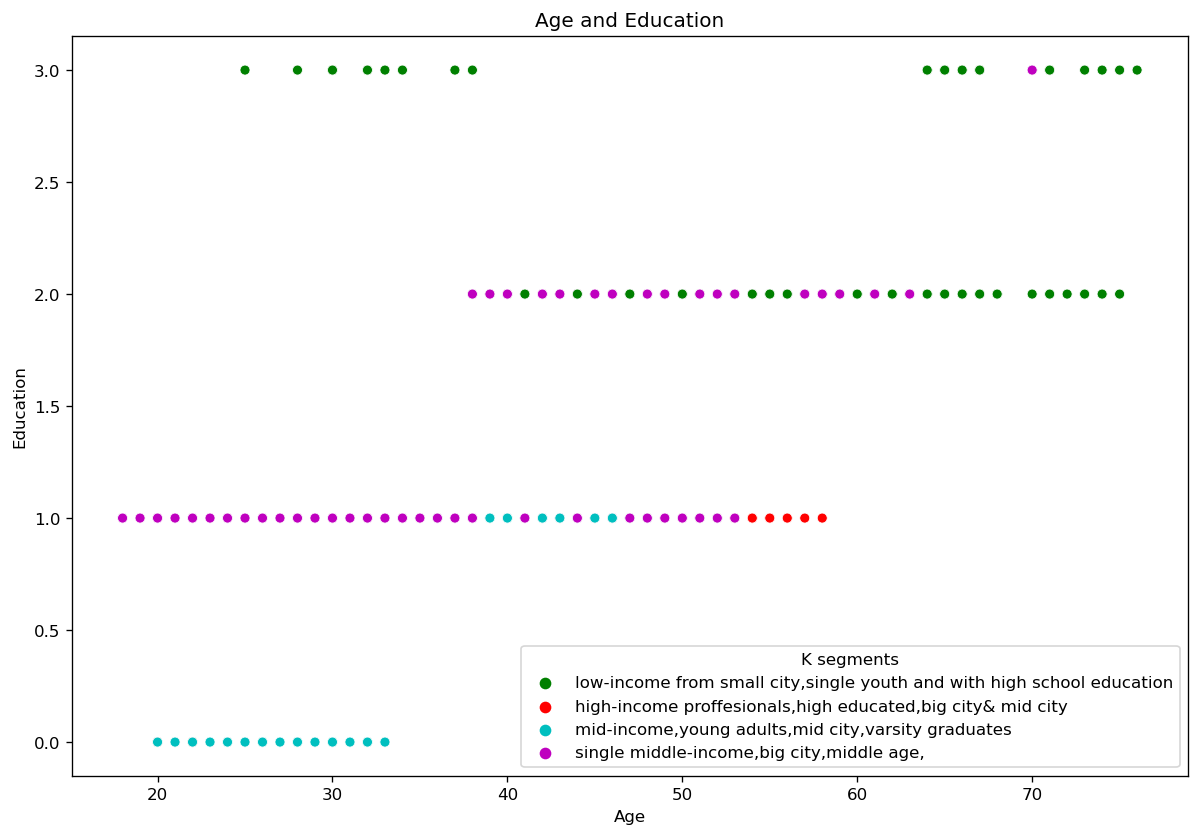

In [33]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Age'], seg_pca_kmeans['Education'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Age and Education')
plt.show()

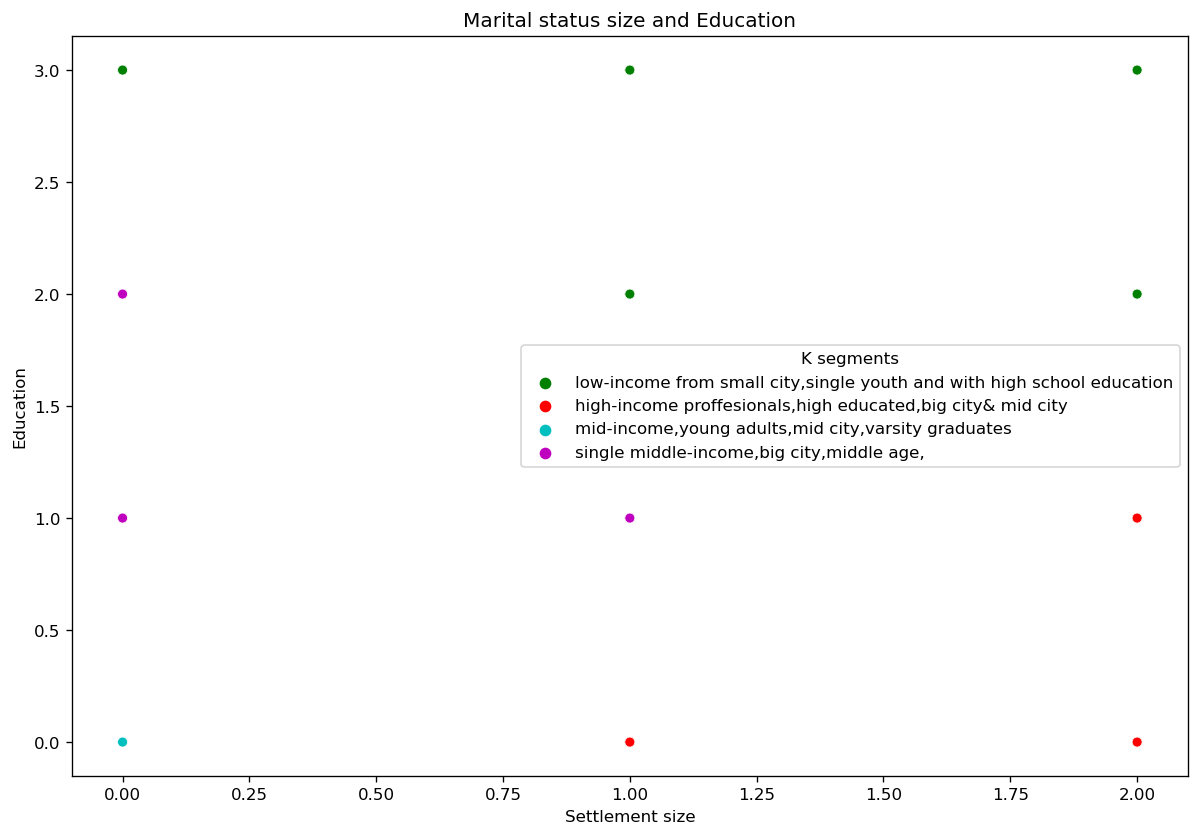

In [34]:
plt.figure(figsize=(12,8), dpi=120)
sns.scatterplot(seg_pca_kmeans['Settlement size'], seg_pca_kmeans['Education'], hue=seg_pca_kmeans['K segments'],palette=['g','r','c','m'])
plt.xlabel('Settlement size')
plt.ylabel('Education')
plt.title('Marital status size and Education')
plt.show()

In [35]:
fig = px.scatter_3d(seg_pca_kmeans, x='Occupation', y='Income', z='Settlement size',
              color='K segments',size_max=18)
fig.update_layout(margin=dict(l=6, r=6, b=6, t=6))

In [36]:
fig = px.scatter_3d(seg_pca_kmeans, x='Sex', y='Marital status', z='Age',
              color='K segments',size_max=18)
fig.update_layout(margin=dict(l=6, r=6, b=6, t=6))